In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("EDI_DATASET_FINAL_BOSS.csv")

In [4]:
df=df.iloc[1:]

In [5]:
df=df.iloc[:,1:]

In [6]:
df

,Material,Length,Width,X,Y,Z,Resultant,Output
1,CRC,10.7,9.2,148.00,-3.46,21.14,149.54,NON-RUSTED
2,CRC,10.7,9.2,141.25,-3.76,24.04,143.33,NON-RUSTED
3,CRC,10.7,9.2,143.35,-3.91,24.04,145.41,NON-RUSTED
4,CRC,10.7,9.2,145.60,-3.46,23.80,147.57,NON-RUSTED
5,CRC,10.7,9.2,145.15,-2.86,24.04,147.16,NON-RUSTED
...,...,...,...,...,...,...,...,...
2051,MS,14.0,14.0,159.78,-15.09,13.28,161.04,RUSTED
2052,MS,14.0,14.0,159.48,-15.24,13.28,160.75,RUSTED
2053,MS,14.0,14.0,159.48,-15.09,13.04,160.72,RUSTED
2054,MS,14.0,14.0,159.48,-14.64,13.04,160.68,RUSTED


In [7]:
df.shape

(2055, 8)

In [8]:
df_non_r=df[df['Output']=='NON-RUSTED']

<Axes: xlabel='Length', ylabel='Resultant'>

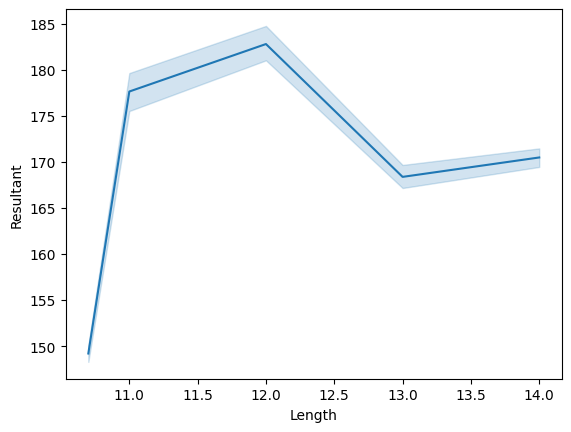

In [9]:
sns.lineplot(x=df_non_r['Length'],y=df_non_r['Resultant'])

<Axes: xlabel='Length', ylabel='Resultant'>

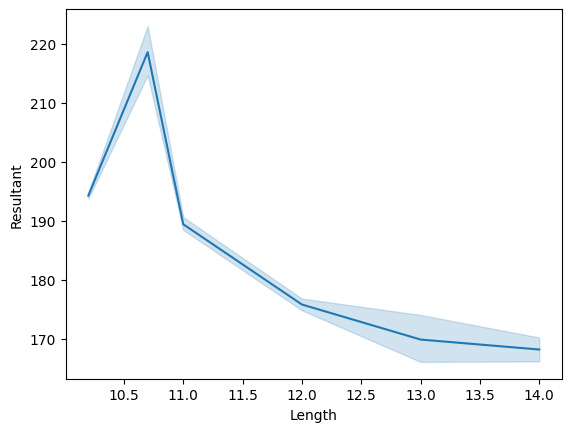

In [10]:
df_r=df[df['Output']=='RUSTED']
sns.lineplot(x=df_r['Length'],y=df_r['Resultant'])

<Axes: xlabel='Length', ylabel='Resultant'>

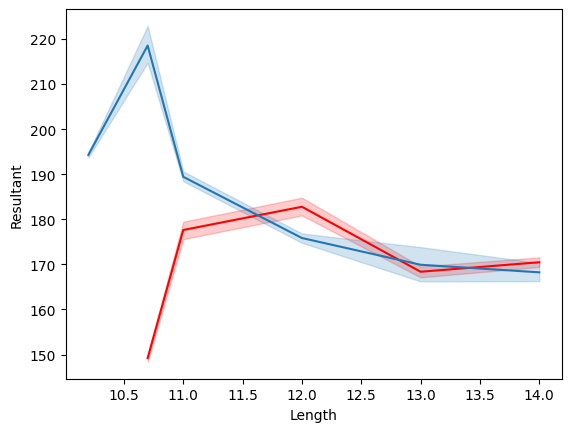

In [11]:
sns.lineplot(x=df_non_r['Length'],y=df_non_r['Resultant'],color='red')
sns.lineplot(x=df_r['Length'],y=df_r['Resultant'])


<Axes: xlabel='Length', ylabel='X'>

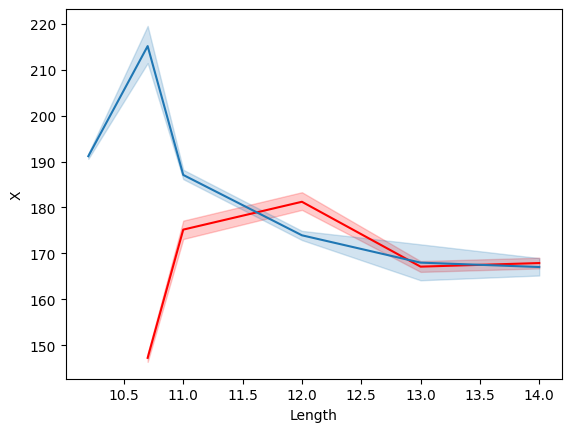

In [12]:
sns.lineplot(x=df_non_r['Length'],y=df_non_r['X'],color='red')
sns.lineplot(x=df_r['Length'],y=df_r['X'])


<Axes: xlabel='Length', ylabel='Y'>

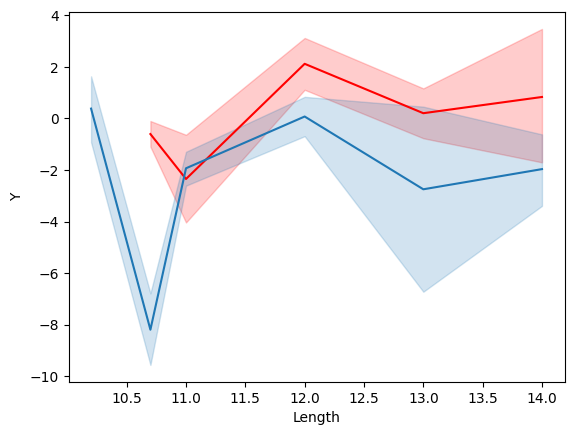

In [13]:
sns.lineplot(x=df_non_r['Length'],y=df_non_r['Y'],color='red')
sns.lineplot(x=df_r['Length'],y=df_r['Y'])


<Axes: xlabel='Length', ylabel='Z'>

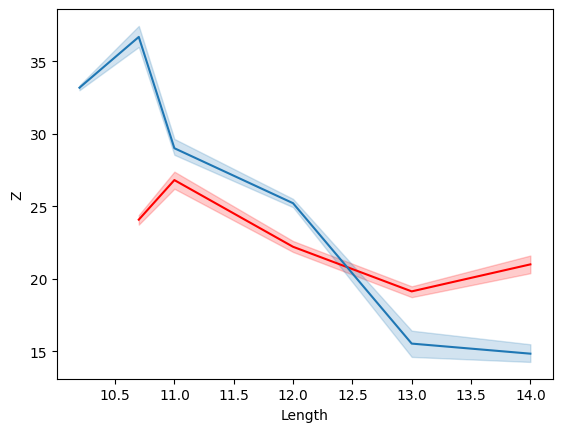

In [14]:
sns.lineplot(x=df_non_r['Length'],y=df_non_r['Z'],color='red')
sns.lineplot(x=df_r['Length'],y=df_r['Z'])


<Axes: xlabel='Length', ylabel='Resultant'>

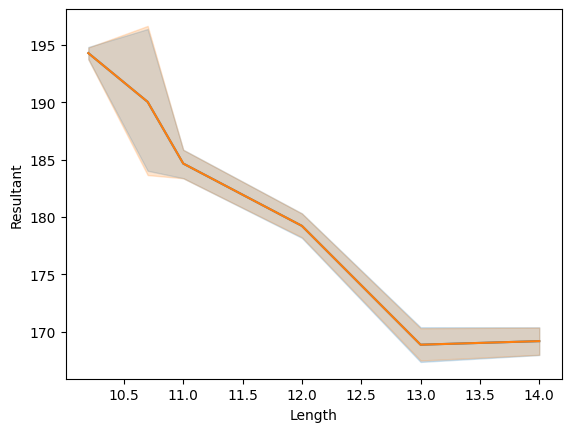

In [15]:
mat=df[df['Material']=='CRC']

sns.lineplot(x=df['Length'],y=df['Resultant'])
sns.lineplot(x=df['Length'],y=df['Resultant'])

<Axes: xlabel='Length', ylabel='Resultant'>

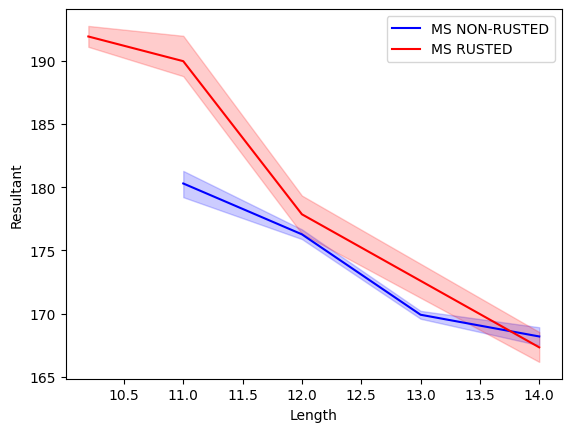

In [16]:
import seaborn as sns
import pandas as pd


df_ms = df[df['Material'] == 'MS']


df_ms_non_r = df_ms[df_ms['Output'] == 'NON-RUSTED']
df_ms_r = df_ms[df_ms['Output'] == 'RUSTED']


sns.lineplot(x=df_ms_non_r['Length'], y=df_ms_non_r['Resultant'], color='BLUE', label='MS NON-RUSTED')
sns.lineplot(x=df_ms_r['Length'], y=df_ms_r['Resultant'], color='RED', label='MS RUSTED')


<Axes: xlabel='Length', ylabel='Resultant'>

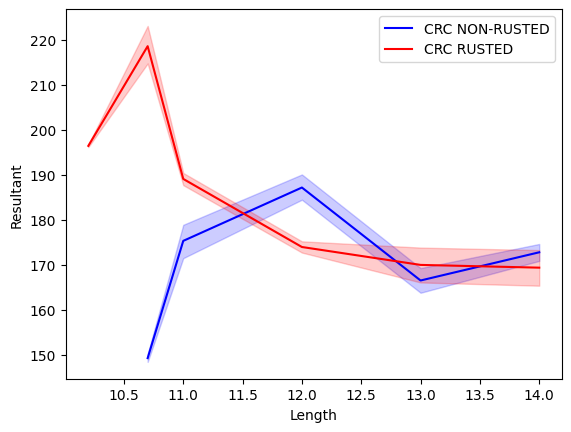

In [17]:
import seaborn as sns
import pandas as pd


df_ms = df[df['Material'] == 'CRC']


df_ms_non_r = df_ms[df_ms['Output'] == 'NON-RUSTED']
df_ms_r = df_ms[df_ms['Output'] == 'RUSTED']


sns.lineplot(x=df_ms_non_r['Length'], y=df_ms_non_r['Resultant'], color='BLUE', label='CRC NON-RUSTED')
sns.lineplot(x=df_ms_r['Length'], y=df_ms_r['Resultant'], color='RED', label='CRC RUSTED')


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=df.iloc[:,:7]

In [20]:
X

,Material,Length,Width,X,Y,Z,Resultant
1,CRC,10.7,9.2,148.00,-3.46,21.14,149.54
2,CRC,10.7,9.2,141.25,-3.76,24.04,143.33
3,CRC,10.7,9.2,143.35,-3.91,24.04,145.41
4,CRC,10.7,9.2,145.60,-3.46,23.80,147.57
5,CRC,10.7,9.2,145.15,-2.86,24.04,147.16
...,...,...,...,...,...,...,...
2051,MS,14.0,14.0,159.78,-15.09,13.28,161.04
2052,MS,14.0,14.0,159.48,-15.24,13.28,160.75
2053,MS,14.0,14.0,159.48,-15.09,13.04,160.72
2054,MS,14.0,14.0,159.48,-14.64,13.04,160.68


In [21]:
y=df['Output']

In [22]:
y

1       NON-RUSTED
2       NON-RUSTED
3       NON-RUSTED
4       NON-RUSTED
5       NON-RUSTED
           ...    
2051        RUSTED
2052        RUSTED
2053        RUSTED
2054        RUSTED
2055        RUSTED
Name: Output, Length: 2055, dtype: object

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3)

In [24]:
X_train.shape

(1438, 7)

In [25]:
X_test.shape

(617, 7)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scalar=StandardScaler()

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


categorical_cols = ['Material']        # Encode this
numeric_cols = [c for c in X.columns if c not in categorical_cols]   # Scale these


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)


model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42))
])


model.fit(X_train, Y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Accuracy: 0.9983792544570502
              precision    recall  f1-score   support

  NON-RUSTED       1.00      1.00      1.00       257
      RUSTED       1.00      1.00      1.00       360

    accuracy                           1.00       617
   macro avg       1.00      1.00      1.00       617
weighted avg       1.00      1.00      1.00       617



In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


categorical_cols = ['Material']        
numeric_cols = [c for c in X.columns if c not in categorical_cols]


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)


model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=2000))
])


model.fit(X_train, Y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Accuracy: 0.6774716369529984
              precision    recall  f1-score   support

  NON-RUSTED       0.63      0.54      0.58       257
      RUSTED       0.70      0.78      0.74       360

    accuracy                           0.68       617
   macro avg       0.67      0.66      0.66       617
weighted avg       0.67      0.68      0.67       617



In [30]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# 20-fold CV
kf = KFold(n_splits=20, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Std Dev:", np.std(scores))


Cross-Validation Scores: [0.67961165 0.63106796 0.63106796 0.66019417 0.66019417 0.74757282
 0.7184466  0.59223301 0.62135922 0.58252427 0.66990291 0.73786408
 0.68932039 0.69902913 0.69902913 0.66666667 0.64705882 0.67647059
 0.69607843 0.65686275]
Mean Accuracy: 0.6681277365315057
Std Dev: 0.04229207342316194


In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


categorical_cols = ['Material']
numeric_cols = [c for c in X.columns if c not in categorical_cols]


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)


model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', DecisionTreeClassifier(
        criterion='gini',
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    ))
])


model.fit(X_train, Y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Accuracy: 0.9854132901134521
              precision    recall  f1-score   support

  NON-RUSTED       0.99      0.98      0.98       257
      RUSTED       0.98      0.99      0.99       360

    accuracy                           0.99       617
   macro avg       0.99      0.98      0.98       617
weighted avg       0.99      0.99      0.99       617



In [32]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


categorical_cols = ['Material']
numeric_cols = [c for c in X.columns if c not in categorical_cols]


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)


model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    ))
])


model.fit(X_train, Y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Accuracy: 0.9983792544570502
              precision    recall  f1-score   support

  NON-RUSTED       1.00      1.00      1.00       257
      RUSTED       1.00      1.00      1.00       360

    accuracy                           1.00       617
   macro avg       1.00      1.00      1.00       617
weighted avg       1.00      1.00      1.00       617



In [33]:
from sklearn.model_selection import StratifiedKFold

skf25 = StratifiedKFold(n_splits=25, shuffle=True, random_state=42)

scores25 = cross_val_score(model, X, y, cv=skf25, scoring='accuracy', n_jobs=-1)

print("25-Fold Scores:", scores25)
print("Mean:", np.mean(scores25))
print("Std:", np.std(scores25))


25-Fold Scores: [1.         1.         0.98795181 1.         1.         1.
 1.         1.         1.         1.         1.         0.98780488
 1.         1.         1.         1.         1.         1.
 0.98780488 1.         1.         0.98780488 0.98780488 1.
 1.        ]
Mean: 0.9975668527769614
Std: 0.004866365425839601


In [34]:
# TRAINING ACCURACY
train_pred = model.predict(X_train)
train_acc = accuracy_score(Y_train, train_pred)
print("Training Accuracy:", train_acc)

# TESTING ACCURACY
test_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test, test_pred)
print("Testing Accuracy:", test_acc)


Training Accuracy: 1.0
Testing Accuracy: 0.9983792544570502


In [35]:
import joblib

joblib.dump(model, "rust_detection_rf_pipeline.pkl")

print("Model saved successfully!")


Model saved successfully!


<Axes: xlabel='Length', ylabel='Resultant'>

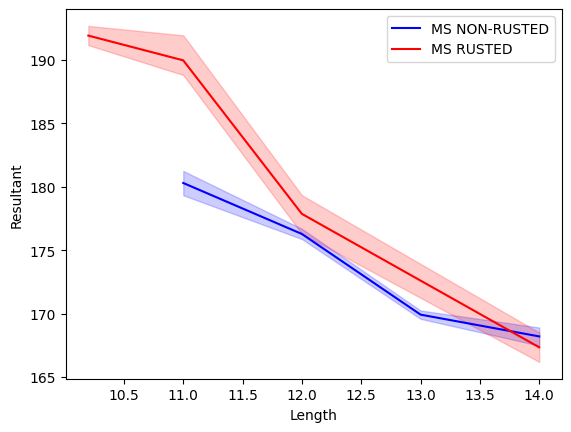

In [36]:
import seaborn as sns
import pandas as pd

# Filter for MS material
df_ms = df[df['Material'] == 'MS']

# Split MS material into rusted / non-rusted
df_ms_non_r = df_ms[df_ms['Output'] == 'NON-RUSTED']
df_ms_r = df_ms[df_ms['Output'] == 'RUSTED']

# Plot
sns.lineplot(x=df_ms_non_r['Length'], y=df_ms_non_r['Resultant'], color='blue', label='MS NON-RUSTED')
sns.lineplot(x=df_ms_r['Length'], y=df_ms_r['Resultant'], color='red', label='MS RUSTED')


<Axes: xlabel='Length', ylabel='Resultant'>

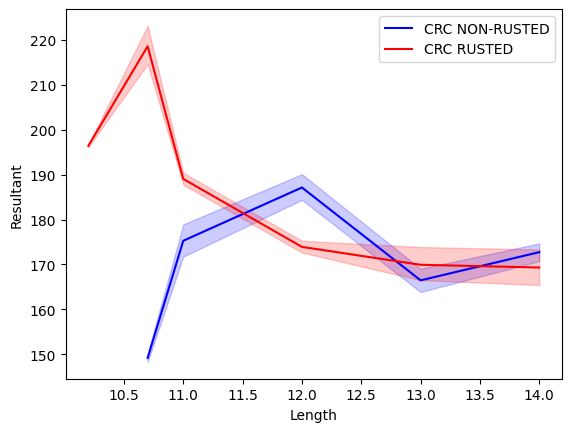

In [37]:
import seaborn as sns
import pandas as pd

# Filter for MS material
df_ms = df[df['Material'] == 'CRC']

# Split MS material into rusted / non-rusted
df_ms_non_r = df_ms[df_ms['Output'] == 'NON-RUSTED']
df_ms_r = df_ms[df_ms['Output'] == 'RUSTED']

# Plot
sns.lineplot(x=df_ms_non_r['Length'], y=df_ms_non_r['Resultant'], color='blue', label='CRC NON-RUSTED')
sns.lineplot(x=df_ms_r['Length'], y=df_ms_r['Resultant'], color='red', label='CRC RUSTED')
